# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [4]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [6]:
type(df)
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


In [7]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [9]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [10]:
df.國文.plot

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

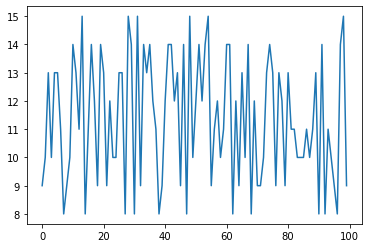

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

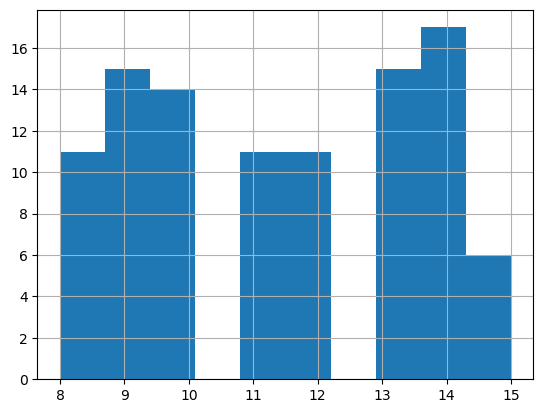

In [11]:
df.國文.hist(bins=10)

## 3 一些基本的資料分析

算平均。

In [13]:
df.國文.mean()

11.39

算標準差。

In [14]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [16]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [30]:
df2 = pd.read_csv("data/grade2.csv") # grades file 會出現Error
df2.corr()

,Unnamed: 0,國文,英文,數學,社會,自然
Unnamed: 0,1.000000,0.034522,0.078753,-0.125129,0.012840,-0.143841
國文,0.034522,1.000000,-0.030090,0.145420,-0.080353,0.008960
英文,0.078753,-0.030090,1.000000,0.018755,-0.020211,0.178214
數學,-0.125129,0.145420,0.018755,1.000000,0.026769,-0.155104
社會,0.012840,-0.080353,-0.020211,0.026769,1.000000,0.111000
自然,-0.143841,0.008960,0.178214,-0.155104,0.111000,1.000000


只算兩科間的相關係數當然也可以。

In [20]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [33]:
df2["總積分"] = df2.sum(axis=1)   
df2.head()

,Unnamed: 0,國文,英文,數學,社會,自然,總積分
0,0,12,6,6,8,12,44
1,1,10,6,13,13,6,49
2,2,11,14,13,13,11,64
3,3,10,13,13,14,12,65
4,4,8,13,14,9,13,61


### 【技巧】

有計算的當然也可以的。

In [36]:
df2['Weight'] = df2.國文+df2.英文+df2.數學*2

In [24]:
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [43]:
df2.sort_values(by=['總積分'], ascending=False).head(10)

,Unnamed: 0,國文,英文,數學,社會,自然,總積分,Weight
97,97,15,8,13,14,14,161,49
95,95,11,9,13,14,10,152,46
99,99,6,11,13,12,10,151,43
96,96,14,9,12,11,9,151,47
88,88,13,12,9,14,14,150,43
94,94,13,11,12,13,6,149,48
87,87,14,14,8,11,12,146,44
92,92,13,7,7,11,14,144,34
81,81,15,15,11,6,15,143,52
98,98,8,11,9,7,10,143,37


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [49]:
df3 = df2.sort_values(by=['Weight','總積分'], ascending=False)

### 【重點】重設 index

In [50]:
df3.index = range(1,101)
df3.head()

,Unnamed: 0,國文,英文,數學,社會,自然,總積分,Weight
1,50,14,15,15,6,12,112,59
2,42,15,15,14,9,13,108,58
3,43,15,12,15,12,6,103,57
4,10,14,13,14,15,9,75,55
5,48,9,15,15,6,7,100,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [51]:
df3[df3.數學==15]

,Unnamed: 0,國文,英文,數學,社會,自然,總積分,Weight
1,50,14,15,15,6,12,112,59
3,43,15,12,15,12,6,103,57
5,48,9,15,15,6,7,100,54
10,14,13,8,15,9,9,68,51
13,53,14,6,15,12,12,112,50
23,35,12,6,15,11,6,85,48
24,22,6,12,15,14,13,82,48
46,5,7,6,15,13,15,61,43


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [55]:
df3[(df3.數學==15) & (df3.英文==15)]

,Unnamed: 0,國文,英文,數學,社會,自然,總積分,Weight
1,50,14,15,15,6,12,112,59
5,48,9,15,15,6,7,100,54


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [67]:
df3 = df2.drop("總積分",axis=1)
df3

,Unnamed: 0,國文,英文,數學,社會,自然,Weight
0,0,12,6,6,8,12,30
1,1,10,6,13,13,6,42
2,2,11,14,13,13,11,51
3,3,10,13,13,14,12,49
4,4,8,13,14,9,13,49
...,...,...,...,...,...,...,...
95,95,11,9,13,14,10,46
96,96,14,9,12,11,9,47
97,97,15,8,13,14,14,49
98,98,8,11,9,7,10,37


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [68]:
df4 = df2.drop("總積分",axis=1, inplace=True)
df4

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [70]:
df

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


In [71]:
df.drop(0)

,姓名,國文,英文,數學,自然,社會
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [76]:
df6 = df.drop(0)
df6

,姓名,國文,英文,數學,自然,社會
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


In [75]:
df6.drop(df6[df6.姓名=='吳志遠'].index)

,姓名,國文,英文,數學,自然,社會
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13
5,張雅岳,13,12,12,12,8
...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14
96,吳筱婷,8,10,14,10,15
97,陳家銘,14,9,11,8,12
98,李明威,15,9,8,9,15


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [8]:
import pandas_datareader as pdr
#df = pdr.get_data_yahoo('AAPL')  # not working
df = pdr.get_data_stooq('AAPL')

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-05-16,212.36,212.5700,209.7700,211.26,54737850
2025-05-15,210.95,212.9600,209.5400,211.45,45029473
2025-05-14,212.43,213.9400,210.5801,212.33,49325825
2025-05-13,210.43,213.4000,209.0000,212.93,51909332
2025-05-12,210.97,211.2679,206.7500,210.79,63775814


#### 只要最後 300 個交易日!

In [11]:
df = df[-300:]
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-26,145.2810,146.8200,144.7300,145.9920,73919702
2021-07-23,144.5810,145.7260,143.9700,145.5690,72912793
2021-07-22,143.0040,145.2030,142.8900,143.8540,78924350
2021-07-21,142.6120,143.1920,141.7240,142.4820,76531564
2021-07-20,140.5820,144.1500,140.0880,143.2120,98326160
...,...,...,...,...,...
2020-05-22,76.8386,77.6800,76.7360,77.5983,84043286
2020-05-21,77.5431,78.0852,76.8621,77.1007,105501097
2020-05-20,77.0593,77.7491,76.9429,77.6800,114558552


#### 20 日的移動平均

Date
2021-07-26          NaN
2021-07-23          NaN
2021-07-22          NaN
2021-07-21          NaN
2021-07-20          NaN
                ...    
2020-05-22    81.118045
2020-05-21    80.718130
2020-05-20    80.322690
2020-05-19    79.854915
2020-05-18    79.403300
Name: Close, Length: 300, dtype: float64

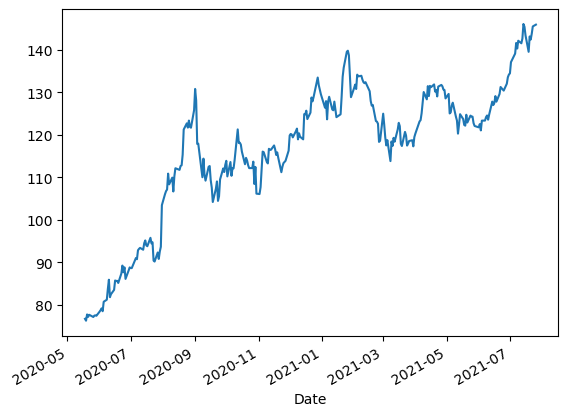

In [13]:
df.Close.plot()
df.Close.rolling(20).mean()

<AxesSubplot:xlabel='Date'>

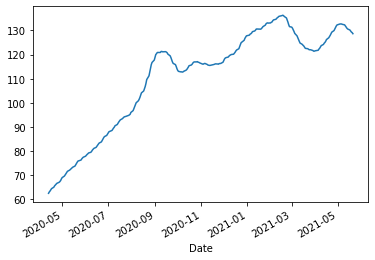

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

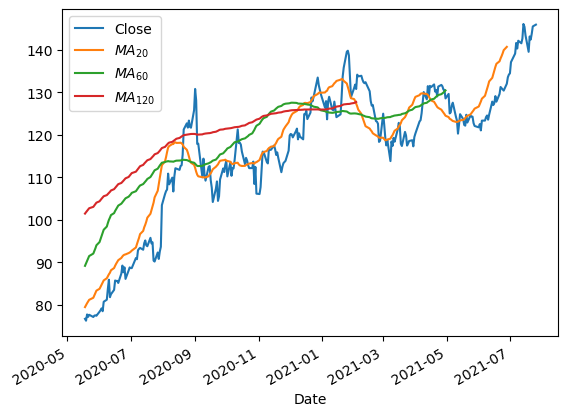

In [15]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
df.Close.rolling(120).mean().plot(label="$MA_{120}$",legend=True)

<Axes: xlabel='Date'>

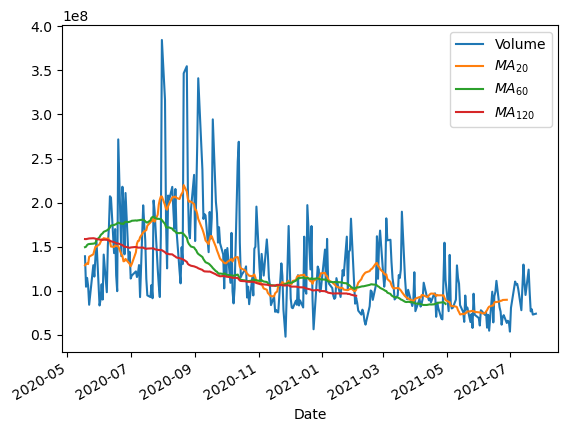

In [16]:
df.Volume.plot(legend=True)
df.Volume.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Volume.rolling(60).mean().plot(label="$MA_{60}$",legend=True)
df.Volume.rolling(120).mean().plot(label="$MA_{120}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [17]:
close = df.Close.values
len(close)

300

In [18]:
x = close[:-1]
len(x)

299

In [19]:
y = close[1:]
len(y)

299

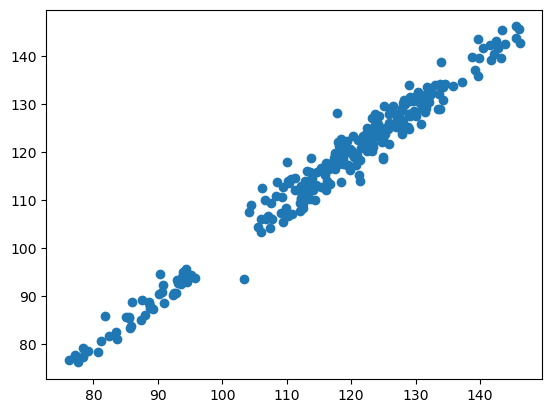

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [24]:
import numpy as np
mydata = np.random.randn(4,3)
mydata

array([[-0.44053045,  0.56335991,  0.22266224],
       [-0.63345898, -0.02495423, -0.09074583],
       [ 0.25838553, -0.10485683,  0.77633059],
       [ 0.07796901,  1.05576828, -0.97311227]])

In [25]:
mydata

array([[-0.44053045,  0.56335991,  0.22266224],
       [-0.63345898, -0.02495423, -0.09074583],
       [ 0.25838553, -0.10485683,  0.77633059],
       [ 0.07796901,  1.05576828, -0.97311227]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [28]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [29]:
df2

,A,B,C
0,-0.440530,0.563360,0.222662
1,-0.633459,-0.024954,-0.090746
2,0.258386,-0.104857,0.776331
3,0.077969,1.055768,-0.973112


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [30]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [31]:
df3

,A,B,C
0,0.295955,1.077275,0.468802
1,-0.101747,0.949077,-1.792881
2,1.768730,0.212458,1.493114


In [41]:
df4 = pd.concat([df2,df3], axis=0)

In [42]:
df4

,A,B,C
0,-0.440530,0.563360,0.222662
1,-0.633459,-0.024954,-0.090746
2,0.258386,-0.104857,0.776331
3,0.077969,1.055768,-0.973112
0,0.295955,1.077275,0.468802
1,-0.101747,0.949077,-1.792881
2,1.768730,0.212458,1.493114


前面我們弄得亂七八糟的 index 重設一下。

In [43]:
df4.index = range(7)

In [44]:
df4

,A,B,C
0,-0.440530,0.563360,0.222662
1,-0.633459,-0.024954,-0.090746
2,0.258386,-0.104857,0.776331
3,0.077969,1.055768,-0.973112
4,0.295955,1.077275,0.468802
5,-0.101747,0.949077,-1.792881
6,1.768730,0.212458,1.493114


#### 横向的貼

In [46]:
df5 = pd.concat([df2,df3], axis=1)

,A,B,C,A,B,C
0,-0.440530,0.563360,0.222662,0.295955,1.077275,0.468802
1,-0.633459,-0.024954,-0.090746,-0.101747,0.949077,-1.792881
2,0.258386,-0.104857,0.776331,1.768730,0.212458,1.493114
3,0.077969,1.055768,-0.973112,NaN,NaN,NaN


等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [47]:
df5

,A,B,C,A,B,C
0,-0.440530,0.563360,0.222662,0.295955,1.077275,0.468802
1,-0.633459,-0.024954,-0.090746,-0.101747,0.949077,-1.792881
2,0.258386,-0.104857,0.776331,1.768730,0.212458,1.493114
3,0.077969,1.055768,-0.973112,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [48]:
df_names = pd.read_csv("data/names.csv",names=['姓名'])

In [49]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [50]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [51]:
df_grades

,國文,英文,數學,社會,自然
0,9,10,8,15,6
1,9,15,6,15,15
2,10,15,9,11,8
3,11,13,13,8,10
4,11,15,13,12,14
...,...,...,...,...,...
95,9,15,9,15,8
96,14,11,8,8,10
97,14,13,15,9,15
98,9,9,14,15,12


In [56]:
df_grades.to_csv('data/grade3.csv',index=0)

In [57]:
df_grades

,國文,英文,數學,社會,自然
0,9,10,8,15,6
1,9,15,6,15,15
2,10,15,9,11,8
3,11,13,13,8,10
4,11,15,13,12,14
...,...,...,...,...,...
95,9,15,9,15,8
96,14,11,8,8,10
97,14,13,15,9,15
98,9,9,14,15,12


In [54]:
df_score = pd.concat([df_names, df_grades], axis=1)

In [55]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,9,10,8,15,6
1,王紹尹,9,15,6,15,15
2,黃季坤,10,15,9,11,8
3,許正書,11,13,13,8,10
4,張鈞蓮,11,15,13,12,14
...,...,...,...,...,...,...
95,陳君生,9,15,9,15,8
96,曾桂甫,14,11,8,8,10
97,林欣怡,14,13,15,9,15
98,林佳霖,9,9,14,15,12
